
# Project: Data Analysis of TMDB Movie Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this dataset, we will be exploring data collected from the The Movie Database (TMDb) which pertains to the characteristics of approximately 11,000 movies. More specifically, we will observe three aspects of this dataset: (1) the popularity of these movies and how it relates to the revenue that was made from people who watch the films, (2) the consumer ratings in relation to the budget that was required to produce the movie and (3) observing the overall trend of movies being produced across different decades. 

>In the dataset, there is a bounty of information represented by columns which stand for specific aspects of films. For example, the 'id' represents the entire entry(film) in the dataset and 'imdb_id' is the specific identifier for that film within IMDB.  
The popularity column represents how popular a film was among viewers, while columns such as 'vote_count' and 'vote_average' represent the overall ratings of movies based on how viewers of the films felt about them. 

>There are the columns involving the financial aspects of the films, such as budget and revenue, which are the amount of money needed to make the film and the amount of money gained after the film was released and see, respectively. The last two columns are 'budget_adj' and 'revenue_adj', both of which are inflation values of films' monetary input and output in the year 2010. There are other columns such as 'cast', 'tagline', 'keywords', 'genres' and 'production_companies' which also hold pertinent information regarding films as well.  

There are several questions that can be produced to investigating this dataset. Here are a few examples of those questions that have been decided for addressing the dataset:

1. Does having a high voter rating average mean that a movie had a large budget? 

2. Are movies that made a tremendous amount of revenue also popular? 

3. Has the trend of movies being produced and released increased over the years?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

As mentioned above, the dataset being investigated is the one regarding The Movie Database. Before we can begin asking questions about the data, we have to gather the data and find out what information is contained within the dataset. The first step is to use the .head() method to display the first 5 rows of the entire dataset so we can get a glimpse of the information that is available for investigation.

In [2]:
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


>This is the first step in wrangling the data I need. By using the .head() method, this gives an overview of the table that is needed to observe what information is available for investigation by displaying the top 5 rows. Using the method saves us the time of having to display the entire dataset and still acquiring a general understanding of the informatiion within the dataset. We can see each column as well as the data that pertains to each column. For example, we can see the values of the films' budgets and revenues, their names, the cast members, the genres of the films and the companies that produced the films. 

In [3]:
def film_info():
    print(df_movies.info())
film_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


With the .info() and .describe() methods, we are given more in-depth information about the dataset and its specific columns. The .info() method gives us a concise summary of the dataset within the dataframe and specific information such as the datatypes, any present non-null values and any missing information. We even included the .info() method into the function _film_into_ because we suspect that this function will be used more than once throughout the report. The .describe() method gives the summary statistics regarding the data in the dataset. This information helps to give a better understanding of the data's statistical information, but only focuses on columns with numerical values. These statistics are useful for addressing the questions presented earlier in the introduction, since we need to aware of different aspects of the data such as voter rating averages (vote_average) and how popular a movie/film is made out to be (popularity). 

In [5]:
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>One last step in understanding the dataset was my curiosity of any possible null values. According to this, there are numerous null values in certain columns, including the production companies, keywords, specific taglines, each movie's specific homepage where it can found online, cast members, directors, genres and overview description of these movies. We could address these null values, however, we won't need to, because we won't even need these columns to answer our particular questions, so we can just filter them out in the data cleaning process. To do this, we use the .isnull() method to find the number of null values that are present within each row corresponding to each column. We also append the .isnull() method with the .sum() to find the total amount of null values found in each column, which gives us the information of how null values are present in the information above. 


### Data Cleaning 

In this section of the report, we know want to clean our data to make it more presentable and remove any information we are not using for this investigation, especially any null values that will impede the exploration part of the datat analysis process.

In [6]:
df_movies.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

>Since we do not need these columns, we can use the .drop() method, which is used to drop specific rows and/or columns based on specificied labels that correspond to the information you want to temporarily removed from the table. This was done to remove the columns that were not needed for the inquiries that will be given later on in this project. Although the dataset, as a whole, is important, the columns are not necessary for the this particular project. 

In [7]:
df_movies.head()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015


>Using the .head() function once again, we see that the columns that were removed and we now have a clearer picture of the data that we need specifically for the questions that will be posed later on in this project.

In [8]:
film_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   genres          10843 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 764.1+ KB
None


>After removing the columns that were not needed and observing the changes made, the _film_info_ function was used once again as well to see if there was any missing information in the new table that was created. There are a few pieces missing from the genre column, but since genre is a string type column, there is no need to be concerned about those values being missing. However, because they are missing and the datatype for this property is a string, its best to just drop those rows altogether in the next cell.

In [9]:
df_movies.dropna(inplace=True)

In [10]:
df_movies.shape

(10843, 9)

In [11]:
film_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10843 non-null  int64  
 1   popularity      10843 non-null  float64
 2   budget          10843 non-null  int64  
 3   revenue         10843 non-null  int64  
 4   original_title  10843 non-null  object 
 5   genres          10843 non-null  object 
 6   vote_count      10843 non-null  int64  
 7   vote_average    10843 non-null  float64
 8   release_year    10843 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 847.1+ KB
None


>With the drop of these rows with the missing information in the genre column, we have an equal amount of entries along with each column. We used the .dropna() method to remove all null values that was remaining from the dataset after it was already cleaned of rows and columns that we would not need to use in this investigation. To confirm this, we use the .shape() method to observe the dimensions of the dataset. The dimensions of any dataset is the array are the rows and columns that pertain to it, represented by a tuple of integers (x, y). With the cleaned dataset, we now have verified the cleaning of this dataset, which is now ready for the next step in the process: exploration. 

<a id='eda'></a>
## Exploratory Data Analysis


### Do movies with high voter rating averages require a tremendous amount of money to make?

> To answer this question, let's first look at the movies with highest voting averages. For this context, we are stating that high voting averages are at least 8.0 or higher. We will conduct a query of these values using the .query() method.

In [12]:
bud = df_movies.query('vote_average > 7.0')
bud

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Western|Drama|Adventure|Thriller,3929,7.2,2015
7,286217,7.667400,108000000,595380321,The Martian,Drama|Adventure|Science Fiction,4572,7.6,2015
...,...,...,...,...,...,...,...,...,...
10822,396,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Drama,74,7.5,1966
10833,3001,0.737730,0,0,How to Steal a Million,Comedy|Crime|Romance,67,7.3,1966
10839,13353,0.276133,0,0,"It's the Great Pumpkin, Charlie Brown",Family|Animation,49,7.2,1966
10842,36540,0.253437,0,0,Winnie the Pooh and the Honey Tree,Animation|Family,12,7.9,1966


With the .query() method, we can call information in a particular fashion. For example, the query above was to find all the films that have a voter rating average of at least 7.0, which has been deemed as the beginning of averages in the higher levels. Also, by renaming the filtered table with a different variable, _bud_, we can refere to this table instead of using the initial csv file from the beginning of the report

In [13]:
bud.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

To verify the absence of null values since the previous implementation, we use the .isnull() method, followed by the .sum() method. As expected, there are no null values in this table.

>Now that we've found these movies, we are going to filter this table by removing all the movies with a budget value of 0, because it does not seem likely that movies with no budget were actually produced. However, this table is still relevant because we will need it to answer our question. It also appears that this table no longer has any null values since the removal of the columns that we did not need for our question.

In [14]:
bud2 = bud[bud.budget != 0]
bud2

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Western|Drama|Adventure|Thriller,3929,7.2,2015
7,286217,7.667400,108000000,595380321,The Martian,Drama|Adventure|Science Fiction,4572,7.6,2015
...,...,...,...,...,...,...,...,...,...
10759,948,1.198849,300000,70000000,Halloween,Horror|Thriller,522,7.3,1978
10762,11778,0.959754,15000000,50000000,The Deer Hunter,Drama|War,464,7.4,1978
10770,11327,0.512719,2300000,35000000,Midnight Express,Drama|Crime,141,7.5,1978
10820,13377,1.227582,315000,0,How the Grinch Stole Christmas!,Animation|Family|Comedy,286,7.1,1966


>After taking the table titled _bud_, the next step in answering this question is finding the values in the budget column. Based on this exploration, it was found that there are some entries that do not have a budget value(0). Since zeroes are still non-null values, it seems unrealistic that there were movies that were made with no financial support whatsoever. So, we will once again remove those entries with 0 as their value in the budget column using the code above. The outcome is renamed _bud2_ which comes from observing the _bud_ table and removing all entries. With this filtered table, now we can create our visuals to get a better look at the relationship between budget values and voter rating averages

In [15]:
bud2.loc[bud['vote_average'] >= 8.4]

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year
4178,278,7.192039,25000000,28341469,The Shawshank Redemption,Drama|Crime,5754,8.4,1994
5986,242575,0.054380,4000000,0,"Guten Tag, RamÃ³n",Drama,11,8.4,2013
7948,24128,0.283191,1200000,4978922,Stop Making Sense,Documentary|Music,23,8.4,1984


The code above here locates all values in the 'vote_average' column that is at least 8.4 or higher. The outcome shows that 8.4 is the highest voter rating average in the dataframe. 

In [34]:
bud2.loc[bud['budget'] == 280000000]

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Action|Adventure|Science Fiction,4304,7.4,2015


In [33]:
bud2.loc[bud['budget'] <= 280000000]

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Western|Drama|Adventure|Thriller,3929,7.2,2015
7,286217,7.667400,108000000,595380321,The Martian,Drama|Adventure|Science Fiction,4572,7.6,2015
...,...,...,...,...,...,...,...,...,...
10759,948,1.198849,300000,70000000,Halloween,Horror|Thriller,522,7.3,1978
10762,11778,0.959754,15000000,50000000,The Deer Hunter,Drama|War,464,7.4,1978
10770,11327,0.512719,2300000,35000000,Midnight Express,Drama|Crime,141,7.5,1978
10820,13377,1.227582,315000,0,How the Grinch Stole Christmas!,Animation|Family|Comedy,286,7.1,1966


The code above here locates all values in the 'budget' column that is less than or equal to 280 million. This value is used in the code because we wanted to find the movie with the highest budget which was found to be the Avengers: Age of Ultron film with the highest budget in the dataframe. 

>The next step was to find the find the films with the highest voter rating averages and highest budgets needed to make those films. To find these values, we use the .loc method to locate these values based upon arguments that would call the required entries. Finding these values is necessary in developing the visual that we want to create in the next step.

Text(0, 0.5, 'Budget (by Millions)')

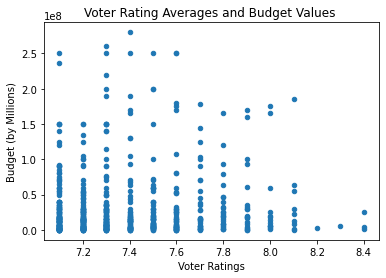

In [17]:
answer_1 = bud2.plot(x='vote_average', y='budget', kind='scatter')
answer_1
plt.title('Voter Rating Averages and Budget Values ')
plt.xlabel('Voter Ratings')
plt.ylabel('Budget (by Millions)')

As the scatterplot displays our data, it appears that the majority of movies with voter rating averages of at between 7.0 and 8.0  have higher budget values than those with voter rating averages that are above 8.0. For example, the films Shawshank Redemption and Stop Making Sense are movies that have the highest voter rating averages in the dataset but they did not require the most amount of money to make, whereas opposed to films such as Jurassic World, Mad Max: Fury Road and Insurgent had lower voter rating averages but had higher budgets. 

### Are movies that make the most money also the most popular?

>For this question, we are observing the relationship between popularity of movies and the revenue they make in purchasing tickets. In order words, we want to find if movies with the highest revenue made are also the most popular. The first step in answering this question is finding the movies that have made the highest revenue in the dataset.

In [18]:
df_movies.head()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015


In [19]:
df_movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

>At this point, we want to utilize the filtered dataset from the beginning of this project so we can have a clean and organized dataset that doesn't have null values or any information that we don't need for our research questions.

In [20]:
df_movies.sort_values(by=['revenue'], inplace=True, ascending=False)
df_movies.head(10)

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year
1386,19995,9.432768,237000000,2781505847,Avatar,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
5231,597,4.355219,200000000,1845034188,Titanic,Drama|Romance|Thriller,4654,7.3,1997
4361,24428,7.637767,220000000,1519557910,The Avengers,Science Fiction|Action|Adventure,8903,7.3,2012
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Action|Adventure|Science Fiction,4304,7.4,2015
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Adventure|Family|Fantasy,3750,7.7,2011
5422,109445,6.112766,150000000,1274219009,Frozen,Animation|Adventure|Family,3369,7.5,2013
5425,68721,4.946136,200000000,1215439994,Iron Man 3,Action|Adventure|Science Fiction,6882,6.9,2013


>This time, we altered the dataset to be ordered by the revenue column so we can see which films have made the most revenue. Based on the revenue column, we can see that the top 5 films are Avatar, Stars Wars, Titanic, The Avengers and Jurassic World, in that order. Three of these films are action genres while one is drama and the other is science fiction. The next step is to examine the popularity rating of each film in comparison to revenue made. 

In [21]:
df_movies.sort_values(by=['popularity'], inplace=True, ascending=False)
df_movies.head()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
629,157336,24.949134,165000000,621752480,Interstellar,Adventure|Drama|Science Fiction,6498,8.0,2014
630,118340,14.311205,170000000,773312399,Guardians of the Galaxy,Action|Science Fiction|Adventure,5612,7.9,2014
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015


>Now that we sorted the dataset by the popularity rating of films, we can see the difference in the list of films. We can clearly see that the movies that made the most money are not the most popular because Jurassic World is the only film of the five that made the most money to still be at the top of the list of films. So between the five movies that made the most money, Jurassic World is also the most popular, whereas the other four movies that made more money than Jurassic World are less popular. We will create a scatterplot to better illustrate the difference in revenue and popularity.

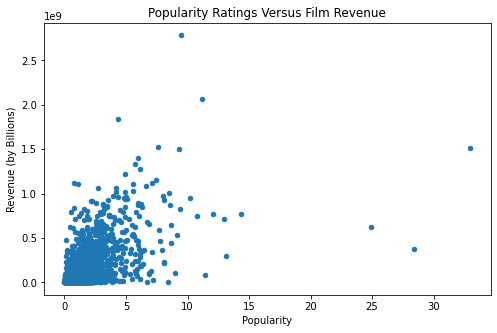

In [22]:
df_movies.plot(x='popularity', y='revenue', kind='scatter', figsize=(8,5))
plt.title('Popularity Ratings Versus Film Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue (by Billions)');

>In the scatterplot shown above, we see a mass of data points clutter near the bottom-left corner of the chart, which tells us a lot of movies were not that popular. However, as we expand outwardly, we see there are some movies that made a bit of revenue and are somewhat popular. The most interesting data points, however, are the two we see away from the rest. The data point at the highest point of the chart, this point is the Avatar film because this movie made the most money, followed by Stars Wars, Titanic, The Avengers and Jurassic World. However, along the popularity rating scales, these movies are not that popular, except for Jurassic World, which appears to be the most popular film in the dataset, followed by Mad Max: Fury Road, Interstaller and Guardians of the Galaxy. 

### Are there more movies being released with each passing year ?

>For this final question, we will look at the trend of released movies and see if there has been an increase of movies being produced with each year that has gone byhad the most movies released. To do this, the first step is to find out how many entries belong to each specific year.

In [23]:
df_movies.head()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
629,157336,24.949134,165000000,621752480,Interstellar,Adventure|Drama|Science Fiction,6498,8.0,2014
630,118340,14.311205,170000000,773312399,Guardians of the Galaxy,Action|Science Fiction|Adventure,5612,7.9,2014
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015


>Calling the dataframe is used as a reference to see which columns we are working with in this question. The only column we need to reference for this is the release_year column.

In [24]:
df_movies['release_year'].value_counts()

2014    699
2013    656
2015    627
2012    584
2011    540
2009    531
2008    495
2010    488
2007    438
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
1999    224
1998    210
1996    203
1997    192
1994    184
1993    178
1995    174
1988    145
1989    136
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1976     47
1974     46
1966     46
1975     44
1964     42
1970     40
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

>So based on the values corresponding with each year, we can definitively see that there has been an increase in movies as time has passed by. Technically, our question is already answered, but let's provide a visual so we can have a better depiction of that difference between these years.

<AxesSubplot:title={'center':'Number of Movies Released'}, xlabel='Year', ylabel='Number of Movies'>

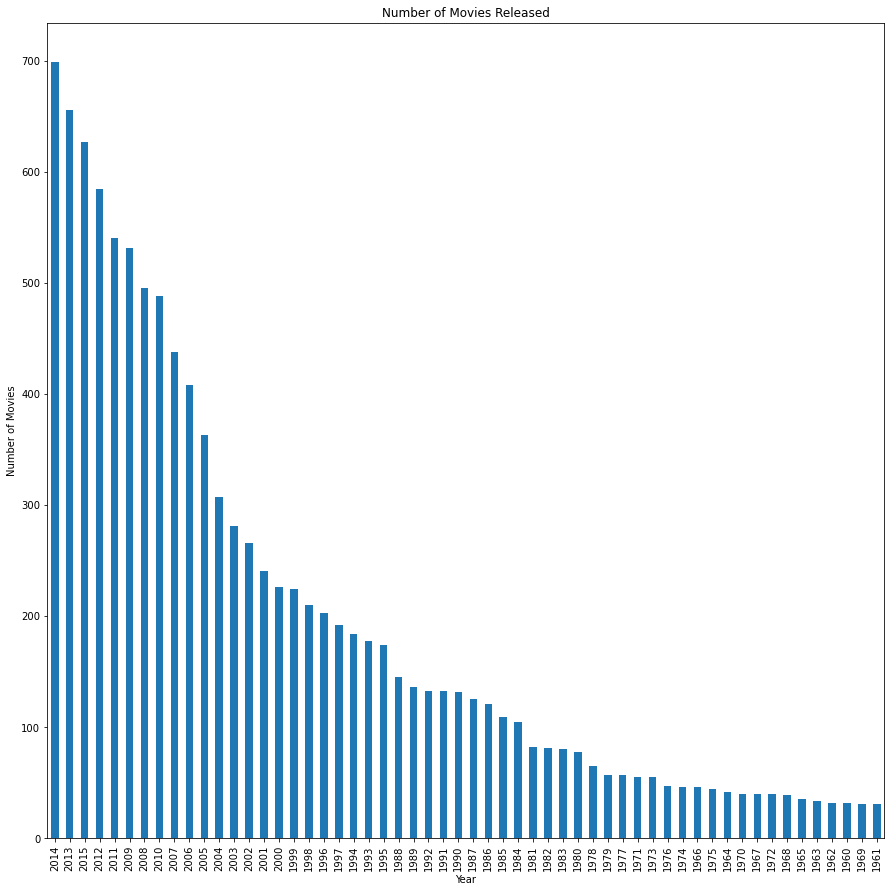

In [25]:
df_movies['release_year'].value_counts().plot.bar(figsize=(15,15), title='Number of Movies Released', xlabel='Year', ylabel = 'Number of Movies')

>With the bar graph depicted above, we now have an illustrated view of movies over the years being produced more and more each year. An interesting aspect of this information is to note that you can see a clear pattern of more movies being released as each year passes, but in the year 2015, there were less movies released than there were in 2014 and 2013, which stands out from the rest of the data. This occurs between various other years where the amount of movies fluctuates but according to the structure of the bar graph, there is an overall trend of increased production of movies across different decades.

<a id='conclusions'></a>
## Conclusions


In this report, we investigated this particular dataset regarding information about movies in the Internet Movie Database (IMDB). In this dataset, we approached it via three different questions: 

   1. Does having a high voter rating average mean that a movie had a large budget? 

   2. Are movies that made a tremendous amount of revenue also popular? 

   3. Has the trend of movies being produced and released increased over the years?

Based upon the investigation conducted, we can conclude with the following findings/results:

**Results**: 

   1. Not all movies that have incredibly high budgets are not as viewer-friendly as expected. It was found that that the majority of movies with voter rating averages did not have as high as a budget as other movies. Basically, movies with higher voter averages do not always require the greatest amount of money to produce. We saw in our example from the Shawshank Redemption and Stop Making Sense films that had the highest voter rating averages in the dataset but also had lower budget values than other films. Jurassic World, along with other films however, had lower voter rating averages but had higher budgets.


   2. Popularity of movies does not equate to high revenue. As an example, we had seen in several extremely outwardly data points that represented films such as the Avatar, Stars Wars: The Force Awakens, Titanic, The Avengers and Jurassic World because these movie made the most money, but in terms of the popularity rating scales, these movies are were that popular, except for Jurassic World, which was the most popular film in the dataset, followed by Mad Max: Fury Road, Interstaller and Guardians of the Galaxy. In short, not all movies that make the most money are the most popular, and that popularity does not equate to high revenue.


   3. We can definitively see that there has been an increase in movies as time has passed by. The bar graph made earlier illustrated an overall increasing trend of movies being produced and released across time. This trend does demonstrate an increased continuation of the production and release of movies, but there have been some years in which less movies were made, as the graph depicted that the trend did have several fluctuations where the amount of movies made would actually decrease. Overall, however, that increasing trend had shown that the fluctuations did not stop the trend and according to that trend, movies will continue to increase in production with each passing year.

Despite the results, there are a few limitations that must also be addressed:

**Limitations:**

   1. Null values initially present in the data that can potentially interfere in the data analysis process if they are not   
      dealt with
      
      
   2. Difficult to illustrate strong correlations with certain factors because our dataset does not have enough details to make 
      concrete correlations. For example, we cannot definitively state that voter rating averages is effected by popularity or 
      vice-versa because there is no data describing the individuals who view the films in the dataset 
      
      
   3. Several outliers and seemingly unrealistic entries(rows) in the data that can skew information and cause misinterpretation 
      of findings and misrepresent the dataset entirely - some entries have non-null values represented as 0, which does not 
      make sense. However, there is not enough details to fully explain the absence of both budget and revenue values for 
      certain movie entries.

References:

To help me with some of the coding that was used to come to these conclusions, I found aid on a few websites. They will be listed down below for reference:
https://datatofish.com/sort-pandas-dataframe/
https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
https://stackoverflow.com/questions/40155791/how-to-make-a-bar-chart-for-specific-column-in-python
https://www.w3resource.com/pandas/dataframe/dataframe-plot-bar.php